In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
zoo = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/13/Zoo.csv')

In [5]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Data Preprocessing:

In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [10]:
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [11]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


#####  Observation: one frog is venomous and another one is not 

In [12]:
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_7300/3657196168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"


##### hange the venomous one into frog2 to seperate 2 kinds of frog 

In [13]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [17]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

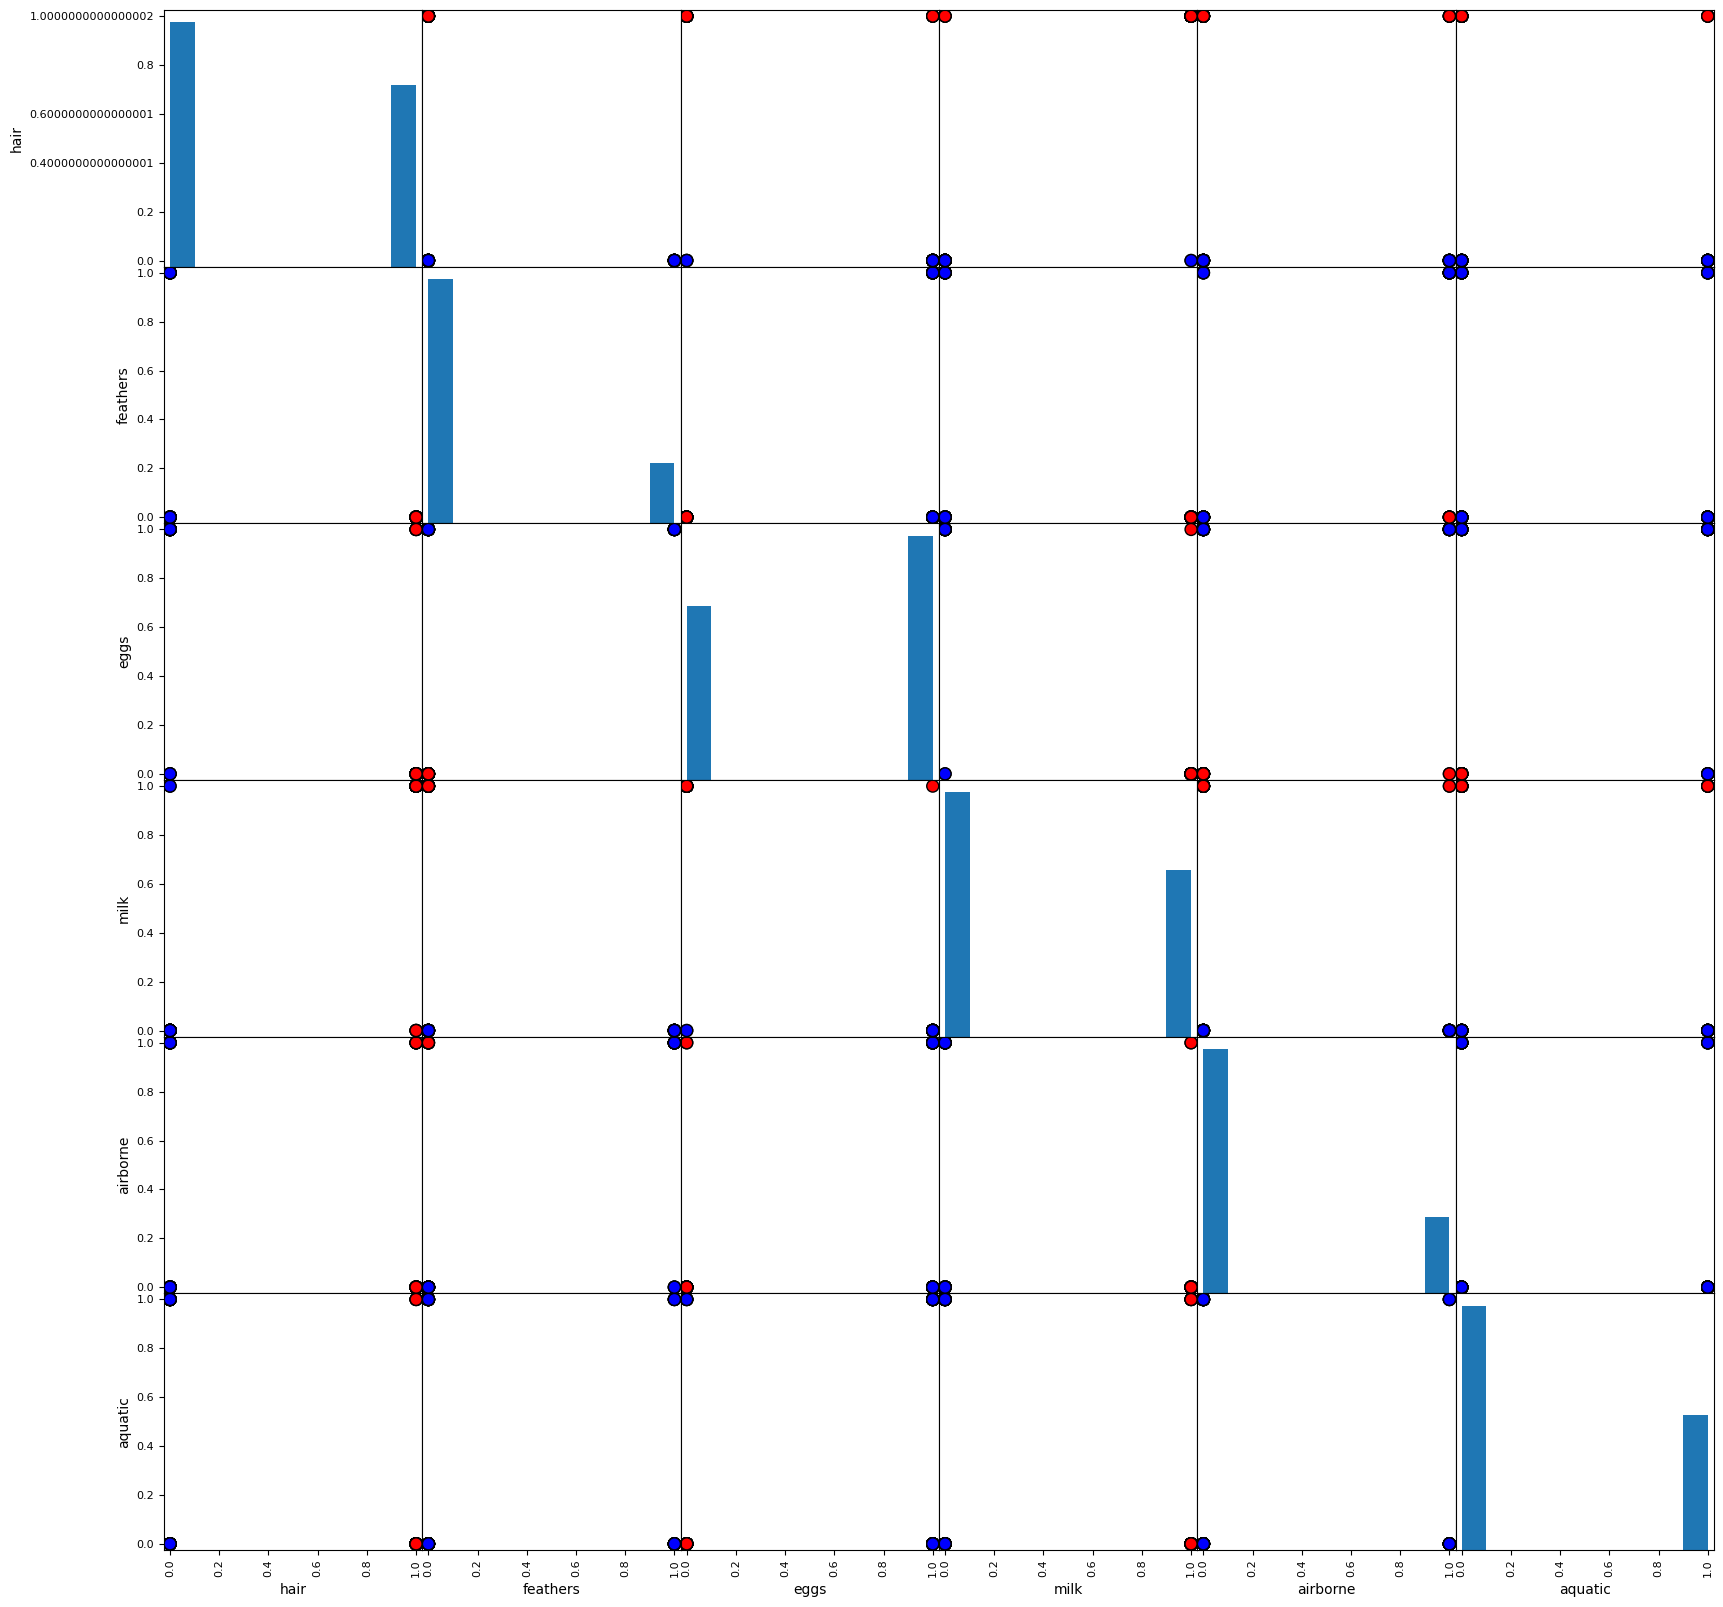

In [20]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


[]

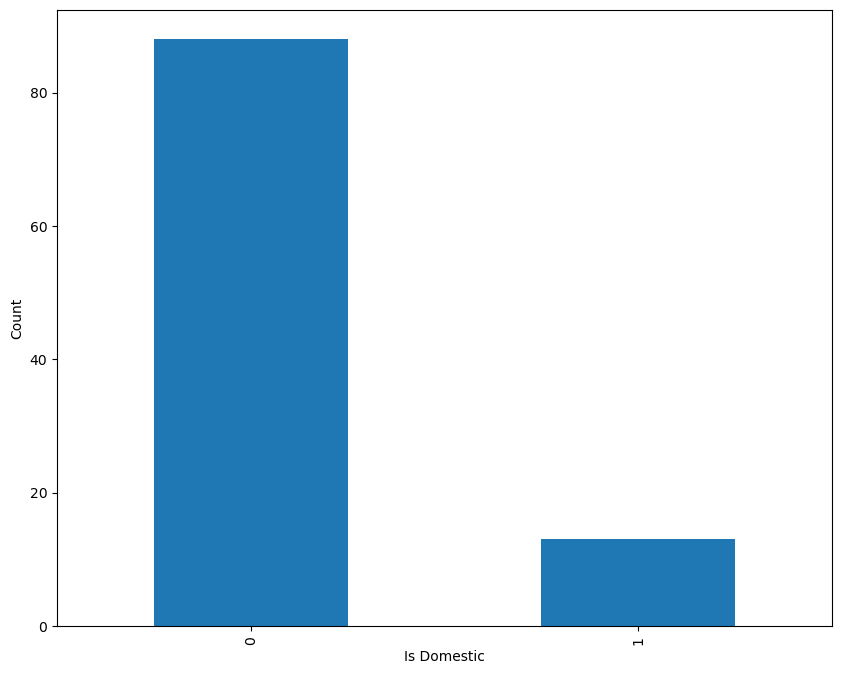

In [21]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

##### We can observe mostly animals are not Domestic.

In [22]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


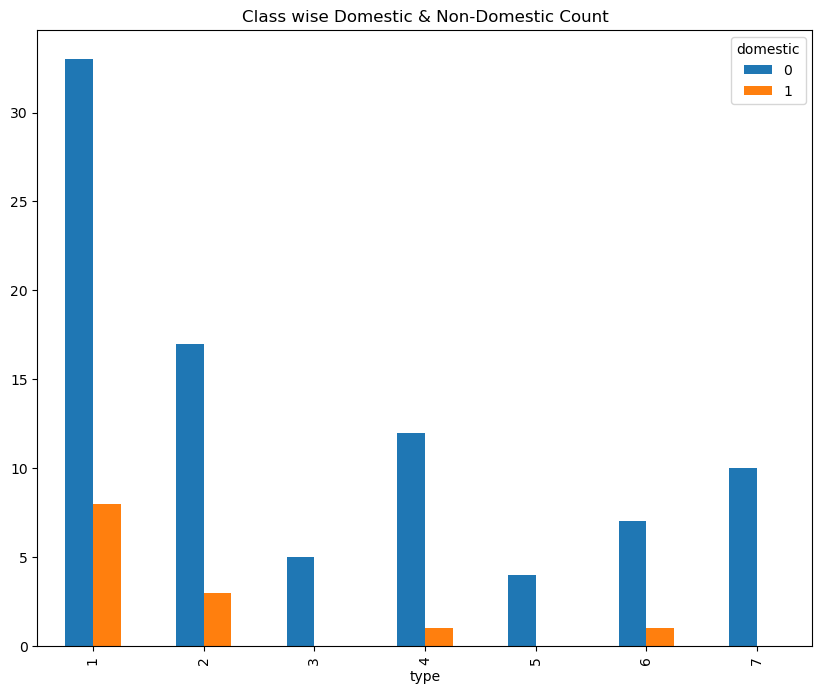

In [23]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [25]:
# how many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [26]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


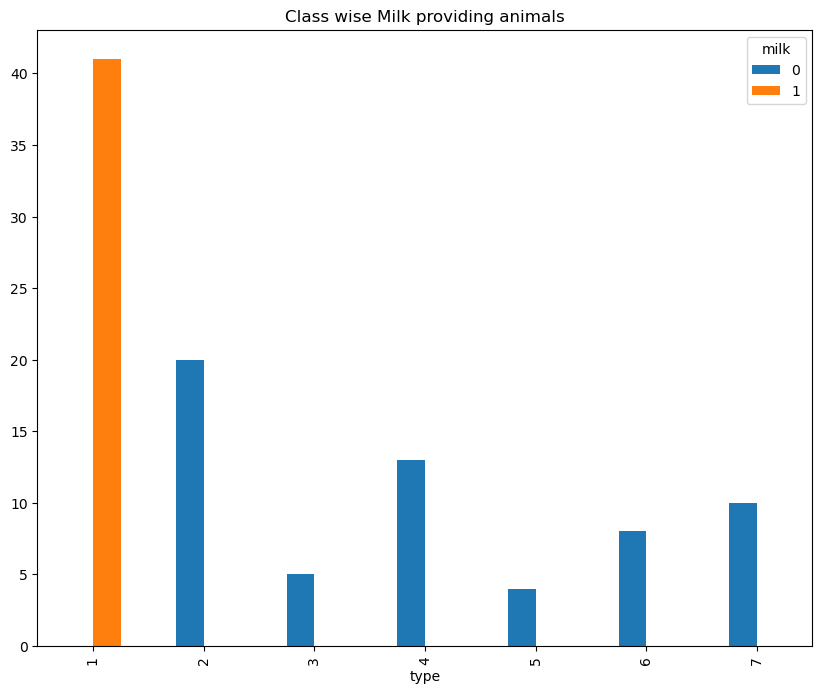

In [27]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [29]:
# Lets see how many animals live under water. i.e aquatic
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [30]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

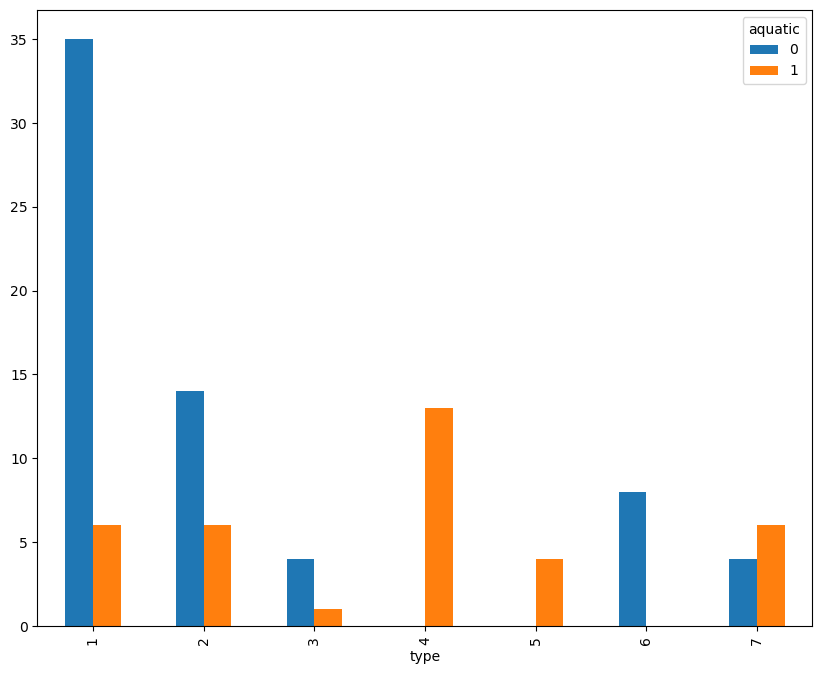

In [31]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [39]:
# finding Unique value of class_type
type_list = [i for i in zoo.type]
unique_type = list(set(type_list))
unique_type


[1, 2, 3, 4, 5, 6, 7]

# Split the Dataset

In [34]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
y = zoo.iloc[:,16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0


In [35]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0


In [37]:
y_train

89    0
26    0
42    0
70    1
15    0
     ..
60    1
71    1
14    0
92    1
51    0
Name: catsize, Length: 80, dtype: int64

In [38]:
y_test

84    0
55    1
66    1
67    1
45    1
39    0
22    1
44    1
10    1
0     1
18    1
30    0
97    0
33    0
77    0
4     1
93    0
78    0
12    0
31    1
76    0
Name: catsize, dtype: int64

# Implement KNN Algorithm

In [40]:
k = 3  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [41]:
#Make Predictions on the Test Set
predictions = knn_model.predict(X_test)

In [42]:
#Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [44]:
# Get the cross-validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, X, y, cv=5)

In [45]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.80952381 0.7        0.75       0.75       0.65      ]
Mean cross-validation score: 0.7319047619047618


### It looks like the model's performance is consistent between the test set and the cross-validation folds, indicating that the model is not overfitting.

# Grid Search for Algorithm Tuning

In [46]:
# Define the hyperparameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]} 

##### we define a hyperparameter grid with different values of n_neighbors (K) to be tested

In [49]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [50]:
# Get the best hyperparameters and the corresponding model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_


In [51]:
# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Best K:", best_k)
print("Test Set Accuracy:", test_accuracy)

Best K: 5
Test Set Accuracy: 0.8571428571428571


##### With this optimal value of k, the KNN model achieved an accuracy of approximately 85.71% on the test set.

